In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv("educacion_online.csv",sep=';')

### Exploración de Datos

In [3]:
datos.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-jun,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-mar,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-mar,No,Mobile,Moderate
3,Girl,nov-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-mar,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [5]:
is_null = datos.isnull().values.any()
is_null

False

(array([663.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 542.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

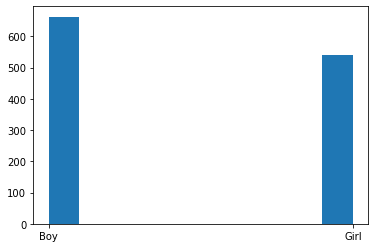

In [6]:
plt.hist(datos['Gender'])

(array([374.,   0., 278.,   0., 353.,   0.,  68.,   0.,  51.,  81.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

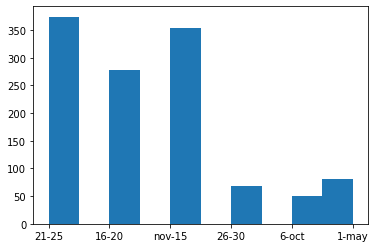

In [7]:
plt.hist(datos['Age'])

(array([625.,   0.,   0.,   0.,   0., 480.,   0.,   0.,   0., 100.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

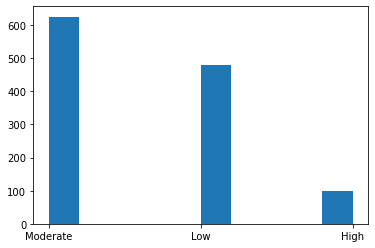

In [8]:
plt.hist(datos['Adaptivity Level'])

### Extracción Target

In [9]:
target = datos["Adaptivity Level"]
datos.drop("Adaptivity Level",inplace=True,axis=1)
target.head()

0    Moderate
1    Moderate
2    Moderate
3    Moderate
4         Low
Name: Adaptivity Level, dtype: object

In [10]:
target.value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

In [11]:
target_num = target.map({'Low':0,'Moderate':1,'High':2})
target_num.value_counts()

1    625
0    480
2    100
Name: Adaptivity Level, dtype: int64

### Limpieza y Transformación de Datos 

In [12]:
datos['Age'].value_counts()

21-25     374
nov-15    353
16-20     278
1-may      81
26-30      68
6-oct      51
Name: Age, dtype: int64

In [13]:
datos['Age'].replace('nov-15','11-15', inplace=True)
datos['Age'].replace('1-may','1-5', inplace=True)
datos['Age'].replace('6-oct','6-10', inplace=True)

In [14]:
datos['Age'].value_counts()

21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: Age, dtype: int64

In [15]:
datos['Class Duration'].value_counts()

1-mar    840
3-jun    211
0        154
Name: Class Duration, dtype: int64

In [16]:
datos['Class Duration'].replace('1-mar','1-3', inplace=True)
datos['Class Duration'].replace('3-jun','3-6', inplace=True)

In [17]:
datos['Class Duration'].value_counts()

1-3    840
3-6    211
0      154
Name: Class Duration, dtype: int64

### One Hot Encode

In [18]:
def generar_ohe(datos,campo,prefijo="",sep="") :
    if prefijo != "" and sep != "" :
        datos = datos.join( pd.get_dummies(datos[campo], prefix=prefijo, prefix_sep=sep) )
    else:
        datos = datos.join( pd.get_dummies(datos[campo]) )
    datos.drop(campo,inplace=True,axis=1)
    return datos

In [19]:
campo = "Gender"
datos = generar_ohe(datos,campo)
datos.head()

,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Boy,Girl
0,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,1,0
1,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,0,1
2,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,0,1
3,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,0,1
4,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,0,1


In [20]:
campo = "Age"
datos = generar_ohe(datos,campo)
datos.head()

,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Boy,Girl,1-5,11-15,16-20,21-25,26-30,6-10
0,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,1,0,0,0,0,1,0,0
1,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,0,1,0,0,0,1,0,0
2,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,0,1,0,0,1,0,0,0
3,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,0,1,0,1,0,0,0,0
4,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,0,1,0,0,1,0,0,0


In [21]:
campo = "Education Level"
datos = generar_ohe(datos,campo)
datos.head()

,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,...,Girl,1-5,11-15,16-20,21-25,26-30,6-10,College,School,University
0,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,...,0,0,0,0,1,0,0,0,0,1
1,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,...,1,0,0,0,1,0,0,0,0,1
2,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,...,1,0,0,1,0,0,0,1,0,0
3,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,...,1,0,1,0,0,0,0,0,1,0
4,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,...,1,0,0,1,0,0,0,0,1,0


In [22]:
campo = "Institution Type"
datos = generar_ohe(datos,campo,"Inst")
datos.head()

,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Boy,...,11-15,16-20,21-25,26-30,6-10,College,School,University,Government,Non Government
0,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,1,...,0,0,1,0,0,0,0,1,0,1
1,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,0,...,0,0,1,0,0,0,0,1,0,1
2,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,0,...,0,1,0,0,0,1,0,0,1,0
3,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,0,...,1,0,0,0,0,0,1,0,0,1
4,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,0,...,0,1,0,0,0,0,1,0,0,1


In [23]:
campo = "IT Student"
datos = generar_ohe(datos,campo, prefijo="IT",sep="_")
datos.head()

,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Boy,Girl,...,21-25,26-30,6-10,College,School,University,Government,Non Government,IT_No,IT_Yes
0,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,1,0,...,1,0,0,0,0,1,0,1,1,0
1,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,0,1,...,1,0,0,0,0,1,0,1,1,0
2,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,0,1,...,0,0,0,1,0,0,1,0,1,0
3,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,0,1,...,0,0,0,0,1,0,0,1,1,0
4,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,0,1,...,0,0,0,0,1,0,0,1,1,0


In [24]:
campo = "Location"
datos = generar_ohe(datos,campo,"Locat","_")
datos.head()

,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Boy,Girl,1-5,...,6-10,College,School,University,Government,Non Government,IT_No,IT_Yes,Locat_No,Locat_Yes
0,Low,Mid,Wifi,4G,3-6,No,Tab,1,0,0,...,0,0,0,1,0,1,1,0,0,1
1,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,0,1,0,...,0,0,0,1,0,1,1,0,0,1
2,Low,Mid,Wifi,4G,1-3,No,Mobile,0,1,0,...,0,1,0,0,1,0,1,0,0,1
3,Low,Mid,Mobile Data,4G,1-3,No,Mobile,0,1,0,...,0,0,1,0,0,1,1,0,0,1
4,Low,Poor,Mobile Data,3G,0,No,Mobile,0,1,0,...,0,0,1,0,0,1,1,0,0,1


In [25]:
campo = "Load-shedding"
datos = generar_ohe(datos,campo,"Shed","_")
datos.head()

,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Boy,Girl,1-5,11-15,...,School,University,Government,Non Government,IT_No,IT_Yes,Locat_No,Locat_Yes,Shed_High,Shed_Low
0,Mid,Wifi,4G,3-6,No,Tab,1,0,0,0,...,0,1,0,1,1,0,0,1,0,1
1,Mid,Mobile Data,4G,1-3,Yes,Mobile,0,1,0,0,...,0,1,0,1,1,0,0,1,1,0
2,Mid,Wifi,4G,1-3,No,Mobile,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1
3,Mid,Mobile Data,4G,1-3,No,Mobile,0,1,0,1,...,1,0,0,1,1,0,0,1,0,1
4,Poor,Mobile Data,3G,0,No,Mobile,0,1,0,0,...,1,0,0,1,1,0,0,1,0,1


In [26]:
campo = "Financial Condition"
datos = generar_ohe(datos,campo,"Fin","_")
datos.head()

,Internet Type,Network Type,Class Duration,Self Lms,Device,Boy,Girl,1-5,11-15,16-20,...,Non Government,IT_No,IT_Yes,Locat_No,Locat_Yes,Shed_High,Shed_Low,Fin_Mid,Fin_Poor,Fin_Rich
0,Wifi,4G,3-6,No,Tab,1,0,0,0,0,...,1,1,0,0,1,0,1,1,0,0
1,Mobile Data,4G,1-3,Yes,Mobile,0,1,0,0,0,...,1,1,0,0,1,1,0,1,0,0
2,Wifi,4G,1-3,No,Mobile,0,1,0,0,1,...,0,1,0,0,1,0,1,1,0,0
3,Mobile Data,4G,1-3,No,Mobile,0,1,0,1,0,...,1,1,0,0,1,0,1,1,0,0
4,Mobile Data,3G,0,No,Mobile,0,1,0,0,1,...,1,1,0,0,1,0,1,0,1,0


In [27]:
campo = "Internet Type"
datos = generar_ohe(datos,campo)
datos.head()

,Network Type,Class Duration,Self Lms,Device,Boy,Girl,1-5,11-15,16-20,21-25,...,IT_Yes,Locat_No,Locat_Yes,Shed_High,Shed_Low,Fin_Mid,Fin_Poor,Fin_Rich,Mobile Data,Wifi
0,4G,3-6,No,Tab,1,0,0,0,0,1,...,0,0,1,0,1,1,0,0,0,1
1,4G,1-3,Yes,Mobile,0,1,0,0,0,1,...,0,0,1,1,0,1,0,0,1,0
2,4G,1-3,No,Mobile,0,1,0,0,1,0,...,0,0,1,0,1,1,0,0,0,1
3,4G,1-3,No,Mobile,0,1,0,1,0,0,...,0,0,1,0,1,1,0,0,1,0
4,3G,0,No,Mobile,0,1,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0


In [28]:
campo = "Network Type"
datos = generar_ohe(datos,campo,"NET","_")
datos.head()

,Class Duration,Self Lms,Device,Boy,Girl,1-5,11-15,16-20,21-25,26-30,...,Shed_High,Shed_Low,Fin_Mid,Fin_Poor,Fin_Rich,Mobile Data,Wifi,NET_2G,NET_3G,NET_4G
0,3-6,No,Tab,1,0,0,0,0,1,0,...,0,1,1,0,0,0,1,0,0,1
1,1-3,Yes,Mobile,0,1,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
2,1-3,No,Mobile,0,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0,0,1
3,1-3,No,Mobile,0,1,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,1
4,0,No,Mobile,0,1,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0


In [29]:
campo = "Class Duration"
datos = generar_ohe(datos,campo,"Durat","_")
datos.head()

,Self Lms,Device,Boy,Girl,1-5,11-15,16-20,21-25,26-30,6-10,...,Fin_Poor,Fin_Rich,Mobile Data,Wifi,NET_2G,NET_3G,NET_4G,Durat_0,Durat_1-3,Durat_3-6
0,No,Tab,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,Yes,Mobile,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,No,Mobile,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,No,Mobile,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,No,Mobile,0,1,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0


In [30]:
campo = "Self Lms"
datos = generar_ohe(datos,campo,"LMS","_")
datos.head()

,Device,Boy,Girl,1-5,11-15,16-20,21-25,26-30,6-10,College,...,Mobile Data,Wifi,NET_2G,NET_3G,NET_4G,Durat_0,Durat_1-3,Durat_3-6,LMS_No,LMS_Yes
0,Tab,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
1,Mobile,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
2,Mobile,0,1,0,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
3,Mobile,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
4,Mobile,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0


In [31]:
campo = "Device"
datos = generar_ohe(datos,campo)
datos.head()

,Boy,Girl,1-5,11-15,16-20,21-25,26-30,6-10,College,School,...,NET_3G,NET_4G,Durat_0,Durat_1-3,Durat_3-6,LMS_No,LMS_Yes,Computer,Mobile,Tab
0,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,0,1,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
3,0,1,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0


In [32]:
datos.insert(loc=0, column='AdaptivityLevel', value=target_num)

In [33]:
datos.head()

,AdaptivityLevel,Boy,Girl,1-5,11-15,16-20,21-25,26-30,6-10,College,...,NET_3G,NET_4G,Durat_0,Durat_1-3,Durat_3-6,LMS_No,LMS_Yes,Computer,Mobile,Tab
0,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,1,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
3,1,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0


In [34]:
datos.shape

(1205, 36)

In [35]:
datos.drop([1200,1201,1202,1203,1204],inplace=True)

In [36]:
datos.shape

(1200, 36)

In [37]:
datos.to_csv("datos_filtrados.csv")